In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [17]:
data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [18]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [19]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [20]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [21]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [22]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy}")
    return W1, b1, W2, b2


In [23]:
# Train the model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

# Save the model
np.savez('digit_recognizer_model.npz', W1=W1, b1=b1, W2=W2, b2=b2)

Iteration: 0, Accuracy: 0.10151219512195123
Iteration: 10, Accuracy: 0.1959268292682927
Iteration: 20, Accuracy: 0.2684390243902439
Iteration: 30, Accuracy: 0.3245609756097561
Iteration: 40, Accuracy: 0.37334146341463414
Iteration: 50, Accuracy: 0.41524390243902437
Iteration: 60, Accuracy: 0.454609756097561
Iteration: 70, Accuracy: 0.49178048780487804
Iteration: 80, Accuracy: 0.5264390243902439
Iteration: 90, Accuracy: 0.5598536585365854
Iteration: 100, Accuracy: 0.5913414634146341
Iteration: 110, Accuracy: 0.6190731707317073
Iteration: 120, Accuracy: 0.6431463414634147
Iteration: 130, Accuracy: 0.6668048780487805
Iteration: 140, Accuracy: 0.6864878048780488
Iteration: 150, Accuracy: 0.705170731707317
Iteration: 160, Accuracy: 0.7212195121951219
Iteration: 170, Accuracy: 0.7343170731707317
Iteration: 180, Accuracy: 0.7452682926829268
Iteration: 190, Accuracy: 0.7543170731707317
Iteration: 200, Accuracy: 0.7623170731707317
Iteration: 210, Accuracy: 0.7693414634146342
Iteration: 220, Acc

In [24]:
# Function to make predictions
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


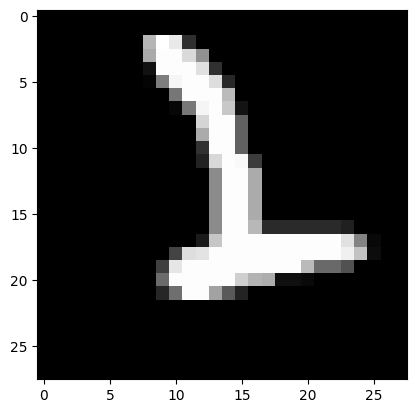

Prediction:  [9]
Label:  9


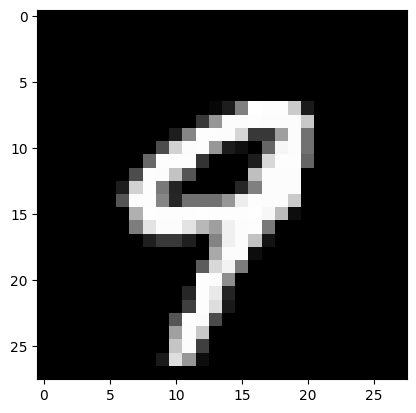

Prediction:  [4]
Label:  4


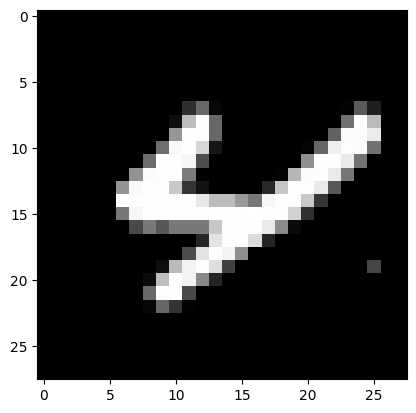

In [27]:

test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)